In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')
closed_deals = pd.read_csv('olist_closed_deals_dataset.csv')
marketing = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')

### Customers DataFrame:

| Column Name         | Description |
|---------------------|-------------|
| customer_id         | A unique code for each customer transaction or interaction |
| customer_unique_id            | A unique code for each customer. |
| customer_zip_code_prefix           | The postal code prefix for the customer's address. |
| customer_city         | The city of the customer. |
| customer_state       | The state of the customer. |

                                           


### Geolocation DataFrame:

| Features         | Description |
|---------------------|-------------|
| geolocation_zip_code_prefix         | Prefix of the Brazilian zip code (CEP) for a specific area |
| geolocation_lat            | Latitude coordinate of the location |
| geolocation_lng           | Longitude coordinate of the location |
| geolocation_city         | Name of the city corresponding to the geolocation |
| geolocation_state       | Name of the state corresponding to the geolocation |

### Orders DataFrame:

| Features         | Description |
|---------------------|-------------|
| order_id         | Unique identifier for the order. |
| customer_id            | Unique identifier for the customer who placed the order |
| order_status           | Current status of the order (e.g., delivered, shipped, cancelled) |
| order_purchase_timestamp         | Timestamp when the order was placed|
| order_approved_at	       | Timestamp when the order was approved |
| order_delivered_carrier_date         | Timestamp when the order was handed over to the delivery carrier |
| order_delivered_customer_date	       | Timestamp when the order was delivered to the customer |
| order_estimated_delivery_date	       | Estimated date for order delivery |

### Order Payments DataFrame:

| Features         | Description |
|---------------------|-------------|
| order_id         | Unique identifier for the order. |
| payment_sequential            | Sequence number if there are multiple payments for an order |
| payment_type           | The method of payment (e.g., credit card, boleto, voucher) |
| payment_installments         | Number of payment installments with a credit card |
| payment_value       | Total value paid for the order |

### Order Items DataFrame:

| Features         | Description |
|---------------------|-------------|
| order_id         | Unique identifier for the order. |
| order_item_id            | A sequential number identifying each item within an order |
| product_id           | Unique identifier for the product |
| seller_id         | Unique identifier for the seller of the product |
| shipping_limit_date       | The deadline date for the product to be shipped |
| price         | The price of the product |
| freight_value       | The shipping cost for the product |

### Order Reviews DataFrame:

| Features         | Description |
|---------------------|-------------|
| order_id         | Unique identifier for the order. |
| review_id            | Unique identifier for each review |
| review_score           | The review score given by the customer, scale from 1 to 5 |
| review_comment_title         | Title of the review comment, if any |
| review_comment_message	       | Detailed comment or message left by the customer as part of the review |
| review_creation_date         | The date and time when the review was created |
| review_answer_timestamp	       | Timestamp when the review was responded to by the seller or the platform |

### Products DataFrame:

| Features         | Description |
|---------------------|-------------|
| product_id         | Unique identifier for each product |
| product_category_name            | The category to which the product belongs |
| product_name_length           | Length of the product name |
| product_description_length         | Length of the product description|
| product_photos_qty	       | Quantity of photos available for the product |
| product_weight_g         | Weight of the product in grams |
| product_length_cm	       | Length of the product in centimeters |
| product_height_cm       | Height of the product in centimeters |
| product_width_cm         | Width of the product in centimeters |

### Sellers DataFrame:

| Features         | Description |
|---------------------|-------------|
| seller_id         | Unique identifier for each seller |
| seller_zip_code_prefix            | The zip code prefix for the seller's address |
| seller_city           | The city where the seller is located |
| seller_state         | The state where the seller is located |

### Category DataFrame:

| Features         | Description |
|---------------------|-------------|
| product_category_name         | Original category name in Portuguese |
| product_category_name_english            | Translated category name in English |

In [3]:
# Step 1: Merge orders with customers
df = pd.merge(orders, customers, on='customer_id', how='left')

In [4]:
# Step 2: Merge with order_items
df = pd.merge(df, order_items, on='order_id', how='left')

In [5]:
# Step 3: Merge with products
df = pd.merge(df, products, on='product_id', how='left')

In [6]:
# Step 4: Merge with product_category_name_translation
df = pd.merge(df, product_category, on='product_category_name', how='left')

In [7]:
# Step 5: Merge with sellers
df = pd.merge(df, sellers, on='seller_id', how='left')

In [8]:
# Step 6: Merge with order_reviews
df = pd.merge(df, order_reviews, on='order_id', how='left')

In [9]:
df.shape

(114092, 36)

In [10]:
# drop columns not required for analysis and modeling
df.drop(columns=['customer_id', 'product_category_name', 
                     'product_name_lenght', 'product_length_cm', 
                     'product_height_cm', 'product_width_cm', 'product_photos_qty','product_name_lenght',
                     'product_description_lenght','product_photos_qty','review_comment_title'], inplace=True)

In [11]:
row,col = df.shape
(df.isna().sum()/row)*100

order_id                          0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.141991
order_delivered_carrier_date      1.735442
order_delivered_customer_date     2.851208
order_estimated_delivery_date     0.000000
customer_unique_id                0.000000
customer_zip_code_prefix          0.000000
customer_city                     0.000000
customer_state                    0.000000
order_item_id                     0.681906
product_id                        0.681906
seller_id                         0.681906
shipping_limit_date               0.681906
price                             0.681906
freight_value                     0.681906
product_weight_g                  0.697683
product_category_name_english     2.115836
seller_zip_code_prefix            0.681906
seller_city                       0.681906
seller_state                      0.681906
review_id                         0.842303
review_scor

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.head(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_weight_g,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,...,500.0,housewares,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,...,400.0,perfumery,31570.0,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114092 non-null  object 
 1   order_status                   114092 non-null  object 
 2   order_purchase_timestamp       114092 non-null  object 
 3   order_approved_at              113930 non-null  object 
 4   order_delivered_carrier_date   112112 non-null  object 
 5   order_delivered_customer_date  110839 non-null  object 
 6   order_estimated_delivery_date  114092 non-null  object 
 7   customer_unique_id             114092 non-null  object 
 8   customer_zip_code_prefix       114092 non-null  int64  
 9   customer_city                  114092 non-null  object 
 10  customer_state                 114092 non-null  object 
 11  order_item_id                  113314 non-null  float64
 12  product_id                    

In [15]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

In [16]:
# A delivery delay column was created to calculate the delay days and analyse the effect on review scores
df['delivery_delay'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date'] ).dt.days

In [17]:
# +ve values mean the delivery was made earlier than expected
df['delivery_delay'].unique()

array([   7.,    5.,   17.,   12.,    9.,   nan,   11.,   31.,    6.,
          8.,   19.,   28.,   16.,   20.,   13.,   14.,  -12.,   25.,
          3.,  -10.,    4.,   -1.,   15.,   -8.,   30.,   10.,   26.,
         -2.,   27.,   18.,    1.,    0.,    2.,   23.,  -18.,   34.,
        -33.,   21.,   -7.,   22.,   32.,  -50.,   24.,   -4.,   33.,
         51.,   41.,   -6.,   -5.,  -34.,  -16.,  -17.,   36.,   29.,
        -14.,   -3.,  -21.,  -48.,   46.,  -30.,   -9.,  -11.,   42.,
         38.,   35.,   47.,   45.,  -28.,  -13.,   49.,  -49.,   39.,
        -74.,  -36.,  -22.,  -20.,   40.,   44.,   59.,   37.,  -15.,
        -31.,  -35.,  -19.,  -92.,   53., -113.,   43.,  -29.,  -26.,
        -46., -110.,  -64.,  -47.,  -67.,  -24.,   48.,   61.,  -27.,
        -23.,  -25.,  -40.,  -75.,   55.,  -42.,   68.,   54.,  -37.,
         63.,  -54.,  -39.,  -61.,   50., -176.,  -56.,  -32.,   52.,
        -41., -105.,  -97.,  -71.,  -38.,  -52.,   67.,  139., -127.,
        -59.,  -44.,

In [18]:
df['delay_status'] = df['delivery_delay'].apply(
    lambda x: 'unknown' if pd.isna(x) 
              else 'long delay' if x < -90  
              else 'delay' if x < 0 
              else 'on time' if x == 0
              else 'early'
    
)

In [19]:
df.head(10)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,delivery_delay,delay_status
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,...,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7.0,early
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,...,31570.0,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,5.0,early
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,...,14840.0,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,17.0,early
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,...,31842.0,belo horizonte,MG,359d03e676b3c069f62cadba8dd3f6e8,5.0,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,12.0,early
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,...,8752.0,mogi das cruzes,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,9.0,early
5,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,...,7112.0,guarulhos,SP,89b738e70a1ce346db29a20fb2910161,4.0,NaN,2017-07-27 00:00:00,2017-07-27 22:48:30,5.0,early
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,...,5455.0,sao paulo,SP,e07549ef5311abcc92ba1784b093fb56,2.0,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42,NaN,unknown
7,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,...,12940.0,atibaia,SP,07d67dd06ed5f88bef11ef6b464e79ae,5.0,NaN,2017-05-27 00:00:00,2017-05-28 02:59:57,11.0,early
8,76c6e866289321a7c93b82b54852dc33,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,...,13720.0,sao jose do rio pardo,SP,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1.0,NaN,2017-02-03 00:00:00,2017-02-05 01:58:35,31.0,early
9,e69bfb5eb88e0ed6a785585b27e16dbf,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,...,8577.0,itaquaquecetuba,SP,abc5655186d40772bd6e410420e6a3ed,5.0,NaN,2017-08-17 00:00:00,2017-08-18 01:47:32,6.0,early


In [20]:
df['delay_status'].unique()

array(['early', 'unknown', 'delay', 'on time', 'long delay'], dtype=object)

In [41]:
#long delay related comments were translated to check how customers behave in such cases
translated = pd.read_csv('E-com_translated_data.csv')
translated.head(2)

,Unnamed: 0.1,Unnamed: 0,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,seller_city,seller_state,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,delivery_delay,delay_status,translated
0,3481,3481,8b7fd198ad184563c231653673e75a7f,delivered,2017-11-14 10:04:27,2017-11-17 08:47:00,2018-02-26 17:27:15,2018-02-27 18:05:08,2017-11-28,d6e35f5a7df8970f8cae8251516ab787,...,sao paulo,SP,8916d07c77cdcde51cee62418954d2d8,1.0,Eu não recebi o quadro da turma do Chaves.,2017-12-02 00:00:00,2017-12-02 03:32:02,-92.0,long delay,I did not receive the board of the Chaves class.
1,3620,3620,4f39a94d6e474819d898d6df7d394996,delivered,2017-04-28 16:28:03,2017-04-29 02:42:51,2017-05-09 14:06:48,2017-09-19 13:54:18,2017-05-30,b0cd6a169aaf7502ca3783e5e7527921,...,sao paulo,SP,305f7cbe3fcbe1bfd677c375b4134b65,2.0,Entrega dentro do prazo porem em um determinad...,2017-05-26 00:00:00,2017-05-29 11:23:51,-113.0,long delay,Delivery on time but in a certain place they d...


In [68]:

# analysing the comments for 1 scored orders in colab. 
 # A model from Hugging Face was used to classify each comment with its issue this DataFrame was found.
data = {
    'issue_classification': [
        'Wrong Item Received',
        'Incomplete Order',
        'Delivery Delay Issue',
        'Product Quality Issue',
        'Customer Service Issue',
        'Seller Issues',
        'No Issue / Positive',
        'Refund/Return Problem',
        'Packaging Issue',
        'Payment/Checkout Issue',
        'App/Website Problem'
    ],
    'count': [
        3285,
        1630,
        1630,
        754,
        440,
        213,
        203,
        203,
        169,
        117,
        101
    ]
}

# Create DataFrame
df_issues = pd.DataFrame(data)


In [63]:
df_issues['%'] = df_issues['count'].apply(lambda x:(x/sum(df_issues['count']))*100)

In [65]:
df_issues.sort_values('%',ascending=False)

,issue_classification,count,%
0,Wrong Item Received,3285,37.564322
1,Incomplete Order,1630,18.639222
2,Delivery Delay Issue,1630,18.639222
3,Product Quality Issue,754,8.622070
4,Customer Service Issue,440,5.031447
5,Seller Issues,213,2.435678
6,No Issue / Positive,203,2.321326
7,Refund/Return Problem,203,2.321326
8,Packaging Issue,169,1.932533
9,Payment/Checkout Issue,117,1.337907


In [ ]:
'''
1. Wrong Item Received 

Recommendations:
- Introduce a double-check step in the order fulfillment workflow.
- Provide customers with product preview confirmation before dispatch.

2. Incomplete Orders 

Recommendations:
- Improve warehouse inventory tracking and bundling processes.
- Use checklist-based packing with automated alerts for missing SKUs.
- Notify customers if items are shipped in multiple packages.

3. Delivery Delay Issues 

Recommendations:
- Optimize delivery partner selection based on region & performance.
- Provide more accurate delivery time estimates at checkout,
(ML model with 24% error was developed to predict delivery time and help set better customer expectations).
- Enable real-time tracking and proactive delay notifications.

'''

# Machine Learning

<Axes: >

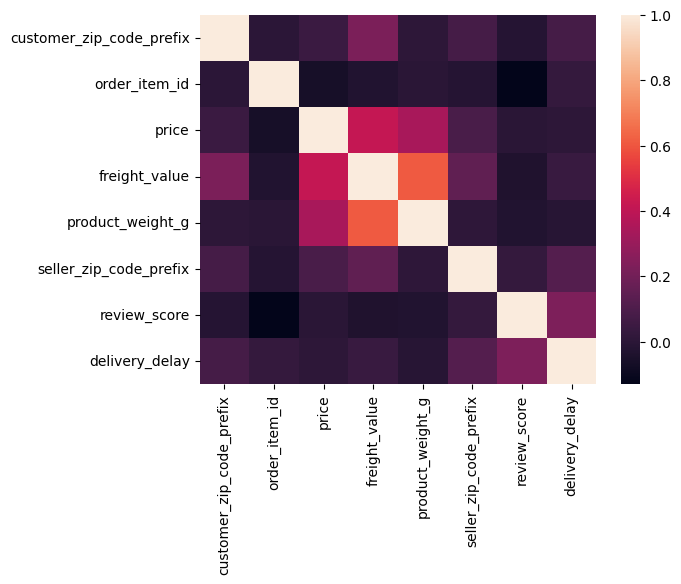

In [22]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True))

In [23]:
df.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_weight_g',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'review_id', 'review_score',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'delivery_delay', 'delay_status'],
      dtype='object')

In [24]:
# choose the important columns that influence the review scores
new_df = df[['order_status','price','freight_value','seller_state','review_score','delivery_delay','customer_state']]

In [25]:
new_df.isnull().sum()

order_status         0
price              778
freight_value      778
seller_state       778
review_score       961
delivery_delay    3253
customer_state       0
dtype: int64

In [26]:
new_df.dropna(subset=['price','freight_value','seller_state','review_score','delivery_delay'],inplace=True)

C:\Users\saljo\AppData\Local\Temp\ipykernel_20132\2845109850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset=['price','freight_value','seller_state','review_score','delivery_delay'],inplace=True)


In [27]:
new_df.isnull().sum()

order_status      0
price             0
freight_value     0
seller_state      0
review_score      0
delivery_delay    0
customer_state    0
dtype: int64

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_attribs = ['price','freight_value','review_score','delivery_delay']
cat_attribs = ['customer_state','seller_state','order_status']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(new_df)
df_prepared = pd.DataFrame(df_prepared,columns=['order_status','price','freight_value','seller_state','review_score','delivery_delay','customer_state'])

features = ['price','freight_value','review_score','customer_state','seller_state','order_status']
target= ['delivery_delay']

# Split data
X = df_prepared[features]
y = df_prepared[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lin_reg.predict(X_test)
y_pred

array([[18.38919389],
       [17.96649593],
       [18.0226305 ],
       ...,
       [18.83842449],
       [17.57470208],
       [19.02579757]], shape=(22003, 1))

In [32]:
error = ((y_pred / y_test.values)-1)*100
error

array([[-12.43241006],
       [-14.44525749],
       [-14.17794999],
       ...,
       [-10.29321671],
       [-16.31094247],
       [ -9.40096397]], shape=(22003, 1))

In [38]:
avg_error = np.mean(error)
avg_error

np.float64(24.676972712768787)